# Analysis of DNA-DNA interaction

In [69]:
import numpy as np

In [71]:
time = []
force = []

for j in range(20, 35, 2):
    force_path = f"/home/wowjason/work/projects/md_lect/dna_dna_interaction_2/pull.{j}_pullf.xvg"    
    with open(force_path, "r") as f:
        tmp_time = []
        tmp_force = []
        for i in f.readlines():
            if i.startswith("@") | i.startswith("#"):
                continue
            elif i == "\n":
                break
            else:
                t, f = i.split()
                tmp_time.append(float(t))
                tmp_force.append(float(f))
        time.append(tmp_time)
        force.append(tmp_force)
                
time = np.array(time)
force = np.array(force)

In [87]:
time.shape

(8, 5001)

### Plot forces

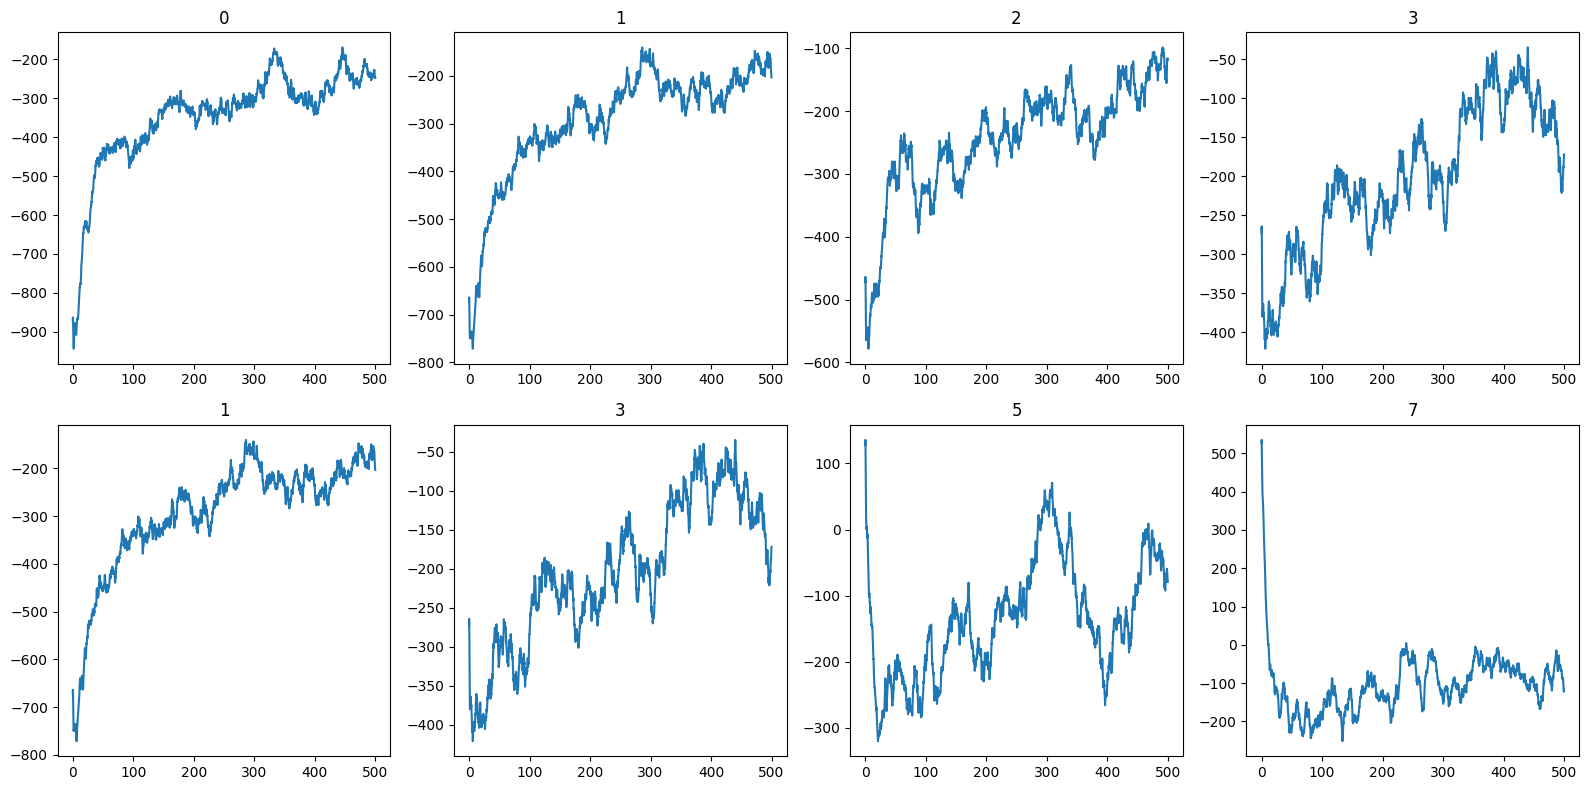

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for i in range(2):
    for j in range(4):
        axs[i][j].plot(time[(i+1) * (j+1) - 1], force[(i+1) * (j+1) - 1])
        axs[i][j].set_title(f"{(i+1) * (j+1) - 1}")
    
plt.tight_layout()
plt.show()

In [74]:
# Set your own time offset
time_offset = 100

mean_forces = np.mean(force[:, time_offset*10:], axis=-1)
mean_forces

array([-299.06035566, -246.60969708, -215.75064746, -168.14170427,
       -129.25435114, -112.68500079, -107.42373933,  -97.69897853])

### Plot mean force

[2.  2.2 2.4 2.6 2.8 3.  3.2 3.4]


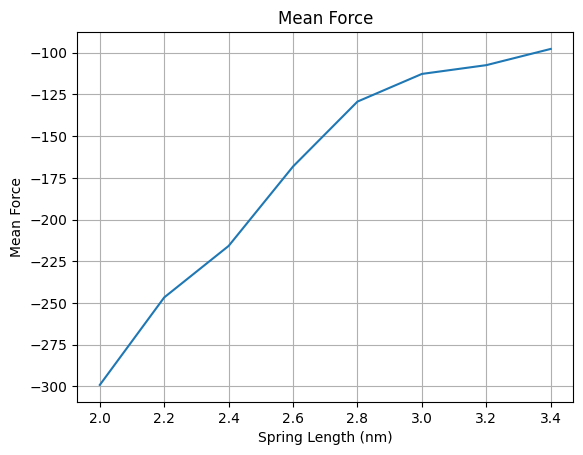

In [90]:
distances = np.arange(2.0, 3.5, 0.2)
print(distances)

plt.figure()
plt.xlabel('Spring Length (nm)')
plt.ylabel('Mean Force')
plt.title('Mean Force')
plt.plot(distances, mean_forces)
plt.grid()
plt.show()

### Plot potential of mean force

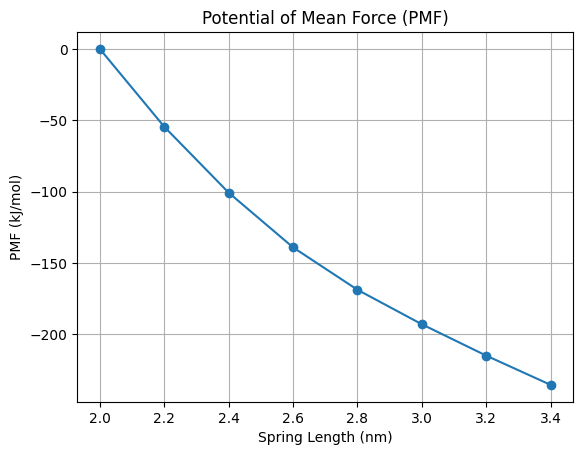

In [76]:
from scipy.integrate import cumulative_trapezoid

pmf = cumulative_trapezoid(mean_forces, distances, initial=0)

plt.plot(distances, pmf, marker='o')
plt.xlabel('Spring Length (nm)')
plt.ylabel('PMF (kJ/mol)')
plt.title('Potential of Mean Force (PMF)')
plt.grid()
plt.show()

In [81]:
import mdtraj as md

spring_length = 20
traj_path = f"/home/wowjason/work/projects/md_lect/dna_dna_interaction_2/pull.{spring_length}/pull_fixed.xtc"
topology_path = "/home/wowjason/work/projects/md_lect/dna_dna_interaction_2/mini.gro"

traj_filename = traj_path.split("/")[-1]
topology_filename = topology_path.split("/")[-1]
traj = md.load(traj_path, top=topology_path)
print(f"Trajectory file : {traj_filename}\nTopology file : {topology_filename}")
print(f"Number of frames : {traj.n_frames}\nNumber of atoms : {traj.n_atoms}\nNumber of residues : {traj.n_residues}")

Trajectory file : pull_fixed.xtc
Topology file : mini.gro
Number of frames : 26
Number of atoms : 107666
Number of residues : 35258


In [82]:
dna_1 = np.arange(0, 1340)
dna_2 = np.arange(1340, 2680)

traj_dna_1 = traj.atom_slice(dna_1)
traj_dna_2 = traj.atom_slice(dna_2)

com_dna_1 = md.compute_center_of_mass(traj_dna_1)
com_dna_2 = md.compute_center_of_mass(traj_dna_2)

na_selection = traj.topology.select("resname NA")
traj_na = traj.atom_slice(na_selection)
coord_na = traj_na.xyz
number_of_na = coord_na.shape[1]

print(f"Center of mass(COM) of DNA1 loaded\nShape of com_dna_1 : {com_dna_1.shape}")
print(f"Center of mass(COM) of DNA2 loaded\nShape of com_dna_2 : {com_dna_2.shape}")
print(f"Coordinates of Na ions\nNumber of Na ions : {number_of_na}")

Center of mass(COM) of DNA1 loaded
Shape of com_dna_1 : (26, 3)
Center of mass(COM) of DNA2 loaded
Shape of com_dna_2 : (26, 3)
Coordinates of Na ions
Number of Na ions : 176


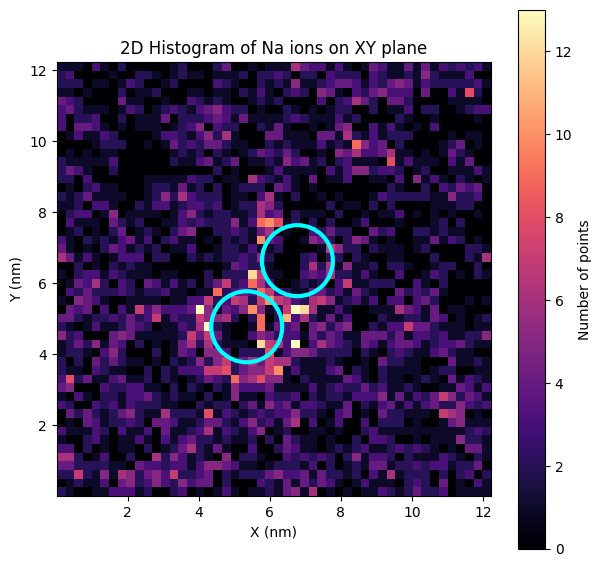

In [83]:
import matplotlib.patches as patches

avg_com_dna_1 = np.mean(com_dna_1[:, :2], axis=0)
avg_com_dna_2 = np.mean(com_dna_2[:, :2], axis=0)

plt.figure(figsize=(7, 7))
plt.hist2d(coord_na[:, :, 0].flatten(), coord_na[:, :, 1].flatten(), bins=50, cmap='magma')

circle_1 = patches.Circle(avg_com_dna_1, 1, color='cyan', fill=False, linewidth=3)
plt.gca().add_patch(circle_1)
circle_2 = patches.Circle(avg_com_dna_2, 1, color='cyan', fill=False, linewidth=3)
plt.gca().add_patch(circle_2)
cbar = plt.colorbar()

plt.title("2D Histogram of Na ions on XY plane")
plt.xlabel("X (nm)")
plt.ylabel("Y (nm)")
cbar.set_label('Number of points')
plt.axis("scaled")

plt.show()

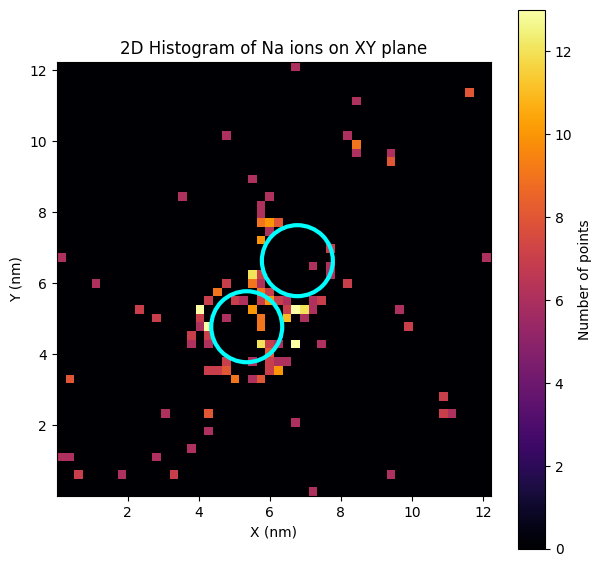

In [84]:
import numpy as np

h, xedges, yedges = np.histogram2d(coord_na[:, :, 0].flatten(), coord_na[:, :, 1].flatten(), bins=50)

threshold = 5
h[h <= threshold] = 0

fig, ax = plt.subplots(figsize=(7, 7))

circle_1 = patches.Circle(avg_com_dna_1, 1, color='cyan', fill=False, linewidth=3, zorder=10)
ax.add_patch(circle_1)
circle_2 = patches.Circle(avg_com_dna_2, 1, color='cyan', fill=False, linewidth=3, zorder=10)
ax.add_patch(circle_2)
pcm = ax.pcolormesh(xedges, yedges, h.T, cmap='inferno')
fig.colorbar(pcm, ax=ax, label='Number of points')
plt.xlabel("X (nm)")
plt.ylabel("Y (nm)")
plt.axis("scaled")
plt.title("2D Histogram of Na ions on XY plane")
plt.show()